<a href="https://colab.research.google.com/github/nidhivanjare/Twitter_SA/blob/main/twitter_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flair 
import pandas as pd 
import flair

     |████████████████████████████████| 286kB 6.5MB/s 
     |████████████████████████████████| 2.5MB 8.9MB/s 
     |████████████████████████████████| 798kB 39.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 983kB 20.9MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 1.2MB 28.9MB/s 
     |████████████████████████████████| 901kB 32.4MB/s 
     |████████████████████████████████| 3.3MB 29.1MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9705 sha256=ff5caa6cffd96b17d43731ca9a3bdfa2c8f6255af00e124eed1e5d75d13995e2
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for mpld3: filename=m

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Dwyane Jonson 

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/DwayneJonson.csv')
df

,Title,Title_URL,css4rbku5_URL,Date,css901oao1,css4rbku52,Tweet,Replies,Likes
0,Jon Ott,https://twitter.com/OriginalJLP,https://twitter.com/OriginalJLP/status/1310328...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,"Welcome to the crew, glad to have you with us.",3.0,30.0
1,Sacchidanand Shinde,https://twitter.com/sacchidanand_bs,https://twitter.com/sacchidanand_bs/status/131...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Love you rock,11.0,11.0
2,Jose,https://twitter.com/TripplegcG,https://twitter.com/TripplegcG/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,All the magatards mad,25.0,129.0
3,LegRah,https://twitter.com/afpanaccio,https://twitter.com/afpanaccio/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,NaN,1.0,69.0
4,Dane Zukes,https://twitter.com/ZRockwellD,https://twitter.com/ZRockwellD/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Does the J stand for Jabroni in Donald J Trump,14.0,14.0
...,...,...,...,...,...,...,...,...,...
193,Mr.Quagmire,https://twitter.com/Mr_Quagmire_USA,https://twitter.com/Mr_Quagmire_USA/status/131...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN
194,platypus puppet,https://twitter.com/platypuspuppet,https://twitter.com/platypuspuppet/status/1310...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,You are the best!,NaN,NaN
195,Nikki Fourtzialas,https://twitter.com/nFourtzi,https://twitter.com/nFourtzi/status/1310949844...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,Ugh sorry to see you have fallen for their BS....,3.0,3.0
196,Jeannie919,https://twitter.com/jeanmc919,https://twitter.com/jeanmc919/status/131095294...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN


In [ ]:
# sentiment_model = flair.models.TextClassifier.load('en-sentiment')
sentiment_model = flair.models.TextClassifier.load('sentiment-fast')

2021-07-07 09:58:51,131 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-fasttext-rnn/sentiment-en-mix-ft-rnn.pt not found in cache, downloading to /tmp/tmpvzihkv5m


100%|██████████| 1242007042/1242007042 [01:57<00:00, 10588236.90B/s]

2021-07-07 10:00:48,793 copying /tmp/tmpvzihkv5m to cache at /root/.flair/models/sentiment-en-mix-ft-rnn.pt


2021-07-07 10:00:53,661 removing temp file /tmp/tmpvzihkv5m
2021-07-07 10:00:53,835 loading file /root/.flair/models/sentiment-en-mix-ft-rnn.pt


In [ ]:
df.drop_duplicates(subset = 'Tweet',
                     keep = False, inplace = True)
nan_value = float("NaN")
# Convert NaN values to empty string
df.replace("", nan_value, inplace=True)

df.dropna(subset = ["Tweet"], inplace=True)

In [ ]:
df1 = df.dropna(subset=['Tweet'])
df1['Likes'] = df1['Likes'].fillna(0)
df1['Likes'] = df1['Likes'].astype(int)


df1
df_base = df1

## 1) Flair


In [ ]:

sentiment =[]
confidence = []

for tweet in df1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)

In [ ]:
print(sentiment)
print(confidence)

['POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NE

In [ ]:
df1['Sent'] = sentiment
df1['Score'] = confidence

In [ ]:
Positive = 0
Negative = 0

for c in df1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
 

print(Positive , Negative)

total_likes = 372700

Retweet = 75800


Influence_DJ = ((114 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_DJ)


66 48
4505.52


In [ ]:
df2 = df_base


## 2) NLTK

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.8176}


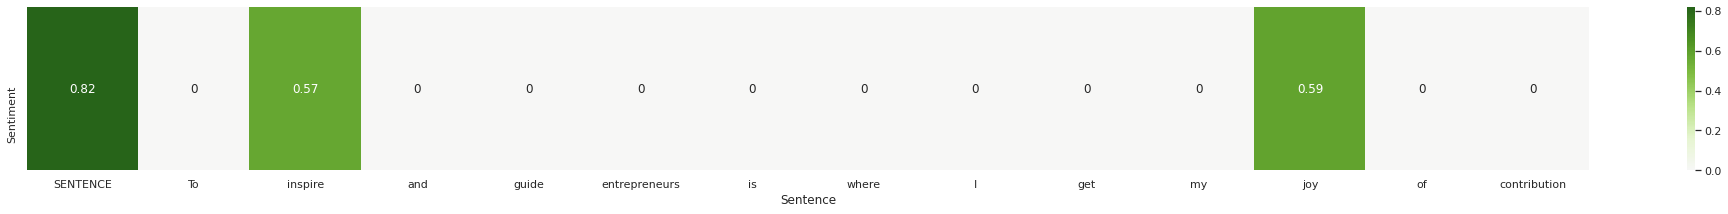

In [ ]:

# import libraries
import pandas as pd
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import model
nltk.download('vader_lexicon')

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize 
def visualize_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# sentiment analysis
sid = SentimentIntensityAnalyzer()

# call method 
print(sid.polarity_scores(sentence))

# heatmap 
visualize_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}
{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.205, 'neu': 0.4, 'pos': 0.395, 'compound': 0.2263}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.235, 'neu': 0.698, 'pos': 0.067, 'compound': -0.7003}
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
{'neg': 0.069, 'neu': 0.554, 'pos': 0.377, 'compound': 0.8979}
{'neg': 0.118, 'neu': 0.7, 'pos': 0.182, 'compound': 0.5411}
{'neg': 0.133, 'neu': 0.696, 'pos': 0.171, 'compound': 0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

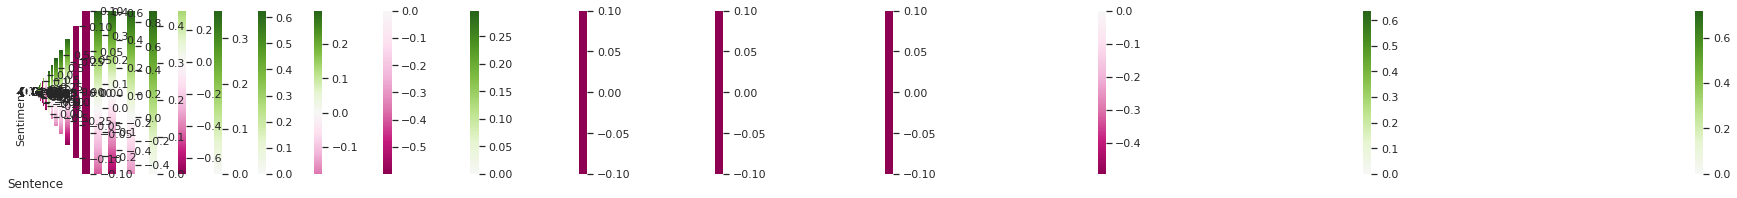

In [ ]:
df3 = df_base
negative = 0
positive = 0
neutral = 0



for tweet in df3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1



Influence_DJ = ((114 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_DJ)

## 3) TEXTBLOB

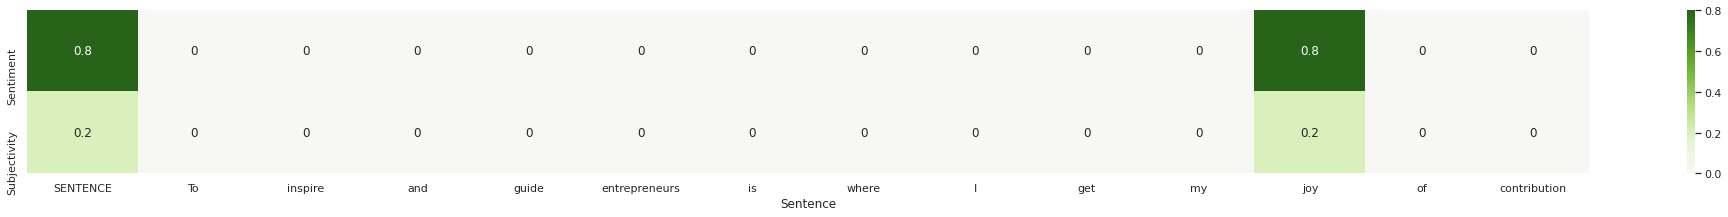

In [ ]:


# import libraries
import pandas as pd
import seaborn as sns
from textblob import TextBlob

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# model
TextBlob(sentence).sentiment

# visualization
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

##Polarity > 0 -> Positive 
##Polarity < 0 -> Negative
##Polarity = 0 -> Neutral

Sentiment(polarity=0.65, subjectivity=0.95)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.20833333333333331, subjectivity=0.43333333333333335)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.08750000000000001, subjectivity=0.39999999999999997)
Sentiment(polarity=0.08333333333333334, subjectivity=0.5833333333333333)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.41666666666666663, subjectivity=0.6944444444444444)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.05000000000000001, subjectivity=0.85)
Sentiment(polarity=-0.0697916666666667, subjectivity=0.740625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.19999999999999998, subjectivity=0.4

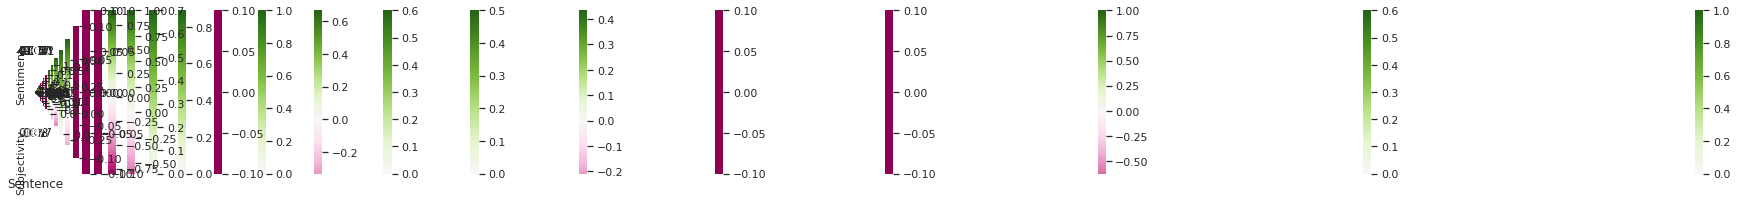

In [ ]:
df4 = df_base
negative1 = 0
positive1 = 0
neutral1 = 0

for tweet in df4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1



Influence_DJ = ((114 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_DJ)


## 4) XgBoost - Algorithmia


In [ ]:
!pip install algorithmia
import Algorithmia

input = "I am glad that I bought this. It works great!"
client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
algo.set_options(timeout=20) # optional

     |████████████████████████████████| 153kB 6.2MB/s 


In [ ]:
df5 = df_base
neg = 0
pos = 0


for tweet in df5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

Influence_DJ = ((114 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_DJ)



    

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

In [ ]:
df_base

,Title,Title_URL,css4rbku5_URL,Date,css901oao1,css4rbku52,Tweet,Replies,Likes,Sent,Score
0,Jon Ott,https://twitter.com/OriginalJLP,https://twitter.com/OriginalJLP/status/1310328...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,"Welcome to the crew, glad to have you with us.",3.0,30,POSITIVE,0.993820
1,Sacchidanand Shinde,https://twitter.com/sacchidanand_bs,https://twitter.com/sacchidanand_bs/status/131...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Love you rock,11.0,11,POSITIVE,0.997806
2,Jose,https://twitter.com/TripplegcG,https://twitter.com/TripplegcG/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,All the magatards mad,25.0,129,NEGATIVE,0.669562
4,Dane Zukes,https://twitter.com/ZRockwellD,https://twitter.com/ZRockwellD/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Does the J stand for Jabroni in Donald J Trump,14.0,14,POSITIVE,0.905379
5,𝑒𝓂𝓂𝓎 𝓁𝑒𝒷𝑒𝒶𝓊,https://twitter.com/emmytargaryen,https://twitter.com/emmytargaryen/status/13103...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,You're the man Dwayne!,1.0,14,POSITIVE,0.954904
...,...,...,...,...,...,...,...,...,...,...,...
191,christine rautio,https://twitter.com/dog_ma63,https://twitter.com/dog_ma63/status/1310944682...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,"thank you for being a man of conscience, and f...",NaN,0,POSITIVE,0.966707
192,Fannie Gray,https://twitter.com/fannnster,https://twitter.com/fannnster/status/131094491...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,Here to support you. I don’t typically follow ...,1.0,1,NEGATIVE,0.631626
194,platypus puppet,https://twitter.com/platypuspuppet,https://twitter.com/platypuspuppet/status/1310...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,You are the best!,NaN,0,POSITIVE,0.998187
195,Nikki Fourtzialas,https://twitter.com/nFourtzi,https://twitter.com/nFourtzi/status/1310949844...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,Ugh sorry to see you have fallen for their BS....,3.0,3,NEGATIVE,0.865826


#Taylor Swift

In [ ]:
TS = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/TaylorSwift.csv')
TS

,Title,Date,Text,Tweets,Replies,Likes,Retweets
0,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,Us too!! \n@JoeBiden,16.0,240.0,6.0
1,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,NaN,NaN,NaN,NaN
2,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,QUEEN,2.0,496.0,9.0
3,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,NaN,5.0,46.0,2.0
4,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,So proud to be a Swiftie! I voted on Friday as...,12.0,109.0,1.0
...,...,...,...,...,...,...,...
187,NaN,NaN,NaN,"I wonder if she willing give up all he money ,...",1.0,1.0,NaN
188,NaN,NaN,NaN,You're crazy.,2.0,3.0,1.0
189,NaN,NaN,NaN,Just keep singing. Stay out of politics.,2.0,4.0,NaN
190,NaN,NaN,NaN,@JoeBiden\n would love to have a party with yo...,5.0,9.0,1.0


In [ ]:
TS.drop_duplicates(subset = 'Tweets',
                     keep = False, inplace = True)


In [ ]:
ts1 = TS.dropna(subset=['Tweets'])
nan_value = float("NaN")
# Convert NaN values to empty string
ts1.replace("", nan_value, inplace=True)


ts1.dropna(subset = ["Tweets"], inplace=True)
ts1['Likes'] = ts1['Likes'].fillna(0)
ts1['Likes'] = ts1['Likes'].astype(int)
Ts_base = ts1
Ts_base



,Title,Date,Text,Tweets,Replies,Likes,Retweets
0,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,Us too!! \n@JoeBiden,16.0,240,6.0
9,NaN,NaN,NaN,OMGGG TAYLOR YOURE HITTING ME WITH YOUR BEAUTY...,3.0,402,31.0
10,NaN,NaN,NaN,making cookies about things we love >>>,2.0,78,2.0
13,NaN,NaN,NaN,QUEEN ILY YOU MAKE ME HPPY,NaN,26,2.0
16,Brianna,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,please VOTE everyone it’s so important in a ti...,1.0,35,1.0
...,...,...,...,...,...,...,...
186,NaN,NaN,NaN,Guess who I’m not listening to anymore,7.0,12,NaN
187,NaN,NaN,NaN,"I wonder if she willing give up all he money ,...",1.0,1,NaN
188,NaN,NaN,NaN,You're crazy.,2.0,3,1.0
189,NaN,NaN,NaN,Just keep singing. Stay out of politics.,2.0,4,NaN


In [ ]:
sentiment =[]
confidence = []

for tweet in ts1['Tweets']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)



ts1['Sent'] = sentiment
ts1['Score'] = confidence
ts1

,Title,Date,Text,Tweets,Replies,Likes,Retweets,Sent,Score
0,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,Us too!! \n@JoeBiden,16.0,240,6.0,NEGATIVE,0.894535
9,NaN,NaN,NaN,OMGGG TAYLOR YOURE HITTING ME WITH YOUR BEAUTY...,3.0,402,31.0,POSITIVE,0.815818
10,NaN,NaN,NaN,making cookies about things we love >>>,2.0,78,2.0,POSITIVE,0.993043
13,NaN,NaN,NaN,QUEEN ILY YOU MAKE ME HPPY,NaN,26,2.0,POSITIVE,0.943030
16,Brianna,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,please VOTE everyone it’s so important in a ti...,1.0,35,1.0,POSITIVE,0.895225
...,...,...,...,...,...,...,...,...,...
186,NaN,NaN,NaN,Guess who I’m not listening to anymore,7.0,12,NaN,POSITIVE,0.560747
187,NaN,NaN,NaN,"I wonder if she willing give up all he money ,...",1.0,1,NaN,POSITIVE,0.563418
188,NaN,NaN,NaN,You're crazy.,2.0,3,1.0,POSITIVE,0.500512
189,NaN,NaN,NaN,Just keep singing. Stay out of politics.,2.0,4,NaN,POSITIVE,0.543358


## 1) Flair

In [ ]:
Positive = 0
Negative = 0

for c in ts1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 59700

total_likes = 396300

print(Positive , Negative)


Influence_TS = ((76 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_TS)

52 24
4581.28


## 2) NKTL


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6531}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.7324}
{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.7717}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.3382}
{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.7096}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.717}
{'neg': 0.356, 'neu': 0.222, 'pos': 0.422, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.8622}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.9612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'ne

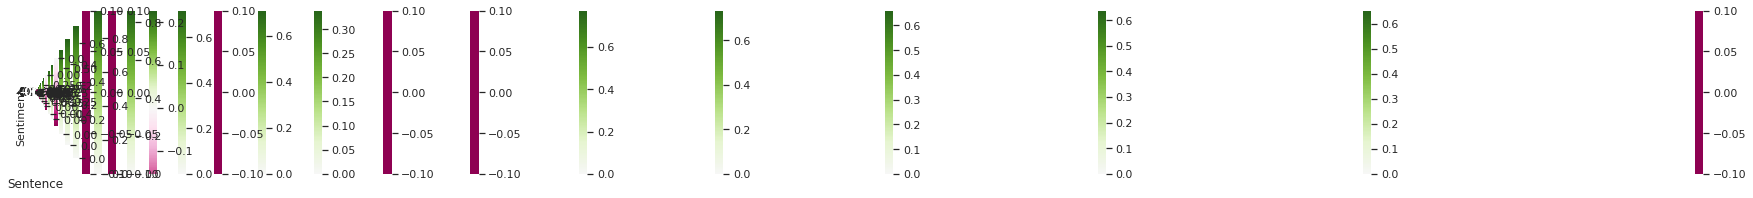

In [ ]:
ts3 = Ts_base
negative = 0
positive = 0
neutral = 0

for tweet in ts3['Tweets']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


Influence_TS = ((76 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_TS)

## 3) Text Blob 

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.390625, subjectivity=0.25)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.35, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.42857142857142855, subjectivity=0.7702380952380953)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Senti

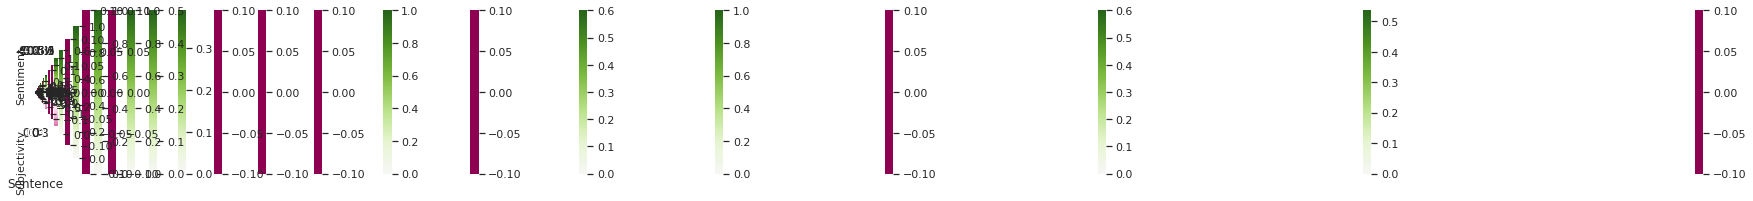

In [ ]:
ts4 = Ts_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in ts4['Tweets']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1



Influence_TS = ((76 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_TS)


## 4) XgBoost - Algorithmia


In [ ]:
ts5 = Ts_base
neg = 0
pos = 0



for tweet in ts5['Tweets']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

Influence_TS = ((76 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_TS)
    

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 

# Mark Cuban 

In [ ]:
MC = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/MarkCuban.csv')
MC

,Text,Date,Tweet,Replies,Likes,Retweets
0,Mark Cuban,"Nov 2, 2020",You know damn well covid hospitalizations are ...,225.0,6600.0,455.0
1,Dom Rapp,"Nov 2, 2020",It won't end with a Biden win. The man won't l...,2.0,2.0,NaN
2,Nolan6,"Nov 2, 2020",I love u mark,NaN,1.0,NaN
3,Blake,"Nov 2, 2020",Didn't you encourage and then join in mass gat...,NaN,2.0,NaN
4,Jerry Gahard,"Nov 2, 2020",That y-axis is egregious,NaN,8.0,NaN
...,...,...,...,...,...,...
134,Ed Merritt,"Nov 2, 2020",Trump 2020! Open up! Open your eyes it's poli...,NaN,NaN,NaN
135,Walter,"Nov 2, 2020",The Democratic Party is lost to the radical le...,NaN,NaN,NaN
136,Vanna Zimmerman,"Nov 2, 2020",TrumpPence2020,NaN,NaN,NaN
137,Humanitarian Human,"Nov 2, 2020","V O T E 4 T R U M P:\n\n@mcuban\n, your vo...",NaN,2.0,NaN


In [ ]:
MC.drop_duplicates(subset = 'Tweet',
                     keep = False, inplace = True)

mc1 = MC.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
mc1.replace("", nan_value, inplace=True)


mc1.dropna(subset = ["Tweet"], inplace=True)
mc1['Likes'] = mc1['Likes'].fillna(0)
mc1['Likes'] = mc1['Likes'].astype(int)

Mc_base = mc1
Mc_base

,Text,Date,Tweet,Replies,Likes,Retweets
0,Mark Cuban,"Nov 2, 2020",You know damn well covid hospitalizations are ...,225.0,6600,455.0
1,Dom Rapp,"Nov 2, 2020",It won't end with a Biden win. The man won't l...,2.0,2,NaN
2,Nolan6,"Nov 2, 2020",I love u mark,NaN,1,NaN
3,Blake,"Nov 2, 2020",Didn't you encourage and then join in mass gat...,NaN,2,NaN
4,Jerry Gahard,"Nov 2, 2020",That y-axis is egregious,NaN,8,NaN
...,...,...,...,...,...,...
132,Tim Madden,"Nov 2, 2020",HAHAHAHAHAHAHAHAHA Whewwww... STOP. Can’t breathe,NaN,0,NaN
133,The Golden Age,"Nov 2, 2020",Fuck off. We’re in \n@realDonaldTrump,NaN,0,NaN
134,Ed Merritt,"Nov 2, 2020",Trump 2020! Open up! Open your eyes it's poli...,NaN,0,NaN
135,Walter,"Nov 2, 2020",The Democratic Party is lost to the radical le...,NaN,0,NaN


## 1) FLAIR

In [ ]:
sentiment =[]
confidence = []

for tweet in mc1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


mc1['Sent'] = sentiment
mc1['Score'] = confidence
mc1



,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,Mark Cuban,"Nov 2, 2020",You know damn well covid hospitalizations are ...,225.0,6600,455.0,NEGATIVE,0.985232
1,Dom Rapp,"Nov 2, 2020",It won't end with a Biden win. The man won't l...,2.0,2,NaN,NEGATIVE,0.922834
2,Nolan6,"Nov 2, 2020",I love u mark,NaN,1,NaN,POSITIVE,0.992436
3,Blake,"Nov 2, 2020",Didn't you encourage and then join in mass gat...,NaN,2,NaN,NEGATIVE,0.826676
4,Jerry Gahard,"Nov 2, 2020",That y-axis is egregious,NaN,8,NaN,NEGATIVE,0.991434
...,...,...,...,...,...,...,...,...
132,Tim Madden,"Nov 2, 2020",HAHAHAHAHAHAHAHAHA Whewwww... STOP. Can’t breathe,NaN,0,NaN,NEGATIVE,0.987254
133,The Golden Age,"Nov 2, 2020",Fuck off. We’re in \n@realDonaldTrump,NaN,0,NaN,NEGATIVE,0.979880
134,Ed Merritt,"Nov 2, 2020",Trump 2020! Open up! Open your eyes it's poli...,NaN,0,NaN,POSITIVE,0.537633
135,Walter,"Nov 2, 2020",The Democratic Party is lost to the radical le...,NaN,0,NaN,NEGATIVE,0.999857


In [ ]:
Positive = 0
Negative = 0

for c in mc1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 1069

total_likes = 9855

print(Positive , Negative)

Influence_MC = ((95 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_MC)

48 47
110.19


## 2) NLTK

{'neg': 0.118, 'neu': 0.789, 'pos': 0.092, 'compound': -0.1531}
{'neg': 0.114, 'neu': 0.642, 'pos': 0.244, 'compound': 0.3915}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.16, 'neu': 0.71, 'pos': 0.13, 'compound': -0.1285}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.227, 'neu': 0.637, 'pos': 0.136, 'compound': -0.2481}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.349, 'neu': 0.458, 'pos': 0.194, 'compound': -0.6939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.4374}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4199}
{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.3802}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

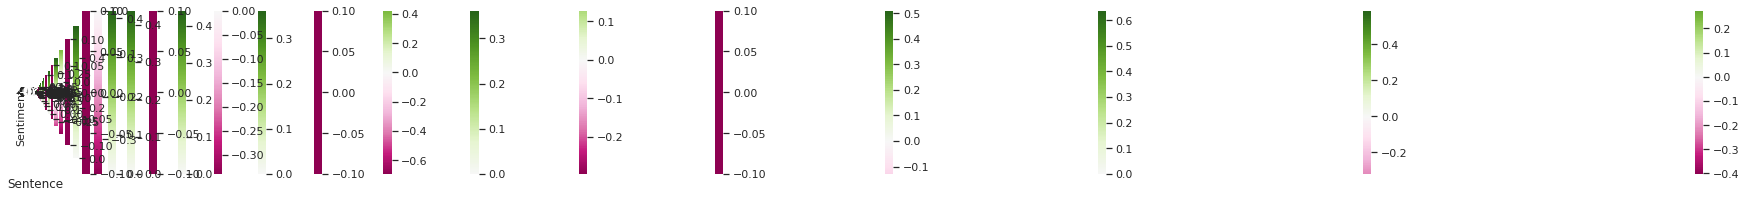

In [ ]:
mc3 = Mc_base
negative = 0
positive = 0
neutral = 0

for tweet in mc3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

Influence_MC = ((95 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_MC)

## 3) TEXT BLOB

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.175, subjectivity=0.525)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4375, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.45, subjectivity=0.65)
Sentiment(polarity=0.25, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.85)
S

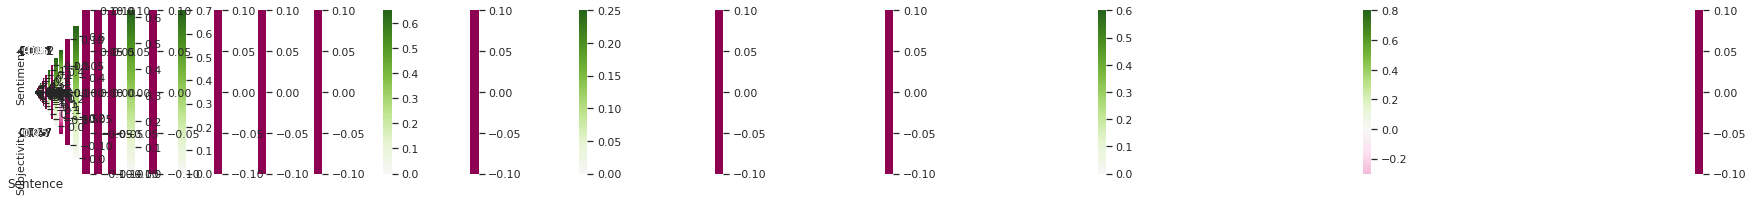

In [ ]:
mc4 = Mc_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in mc4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

Influence_MC = ((95 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_MC)




## 4) XGBOOST - ALOGRITHMA

In [ ]:
mc5 = Mc_base
neg = 0
pos = 0

for tweet in mc5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1


Influence_MC = ((95 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_MC)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

# JOHN LEGEND 

In [ ]:
JL1 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend1.csv')
JL1


,Text,Date,Tweet,Replies,Likes,Retweets
0,JJ,"Jul 26, 2020",Bro why,3.0,16.0,1.0
1,Deborah,"Jul 26, 2020",NaN,NaN,4.0,1.0
2,Nikhil S Joseph,"Jul 26, 2020",You're gonna get a lot of haters :(,1.0,10.0,1.0
3,Dong Rickles,"Jul 26, 2020",we need more \n@Instatituss\n in our day to day,NaN,5.0,2.0
4,Yep It's Me,"Jul 26, 2020",#Trump2020Landslide #Haley2024,1.0,6.0,NaN
5,Kami High,"Jul 26, 2020",Thank you! I wish more people with influence w...,4.0,7.0,NaN
6,Sea Johnston,"Jul 26, 2020",Thank you john.,NaN,3.0,NaN
7,CollegeBound314,"Jul 26, 2020",Can you explain the Obama thing yo wife said t...,7.0,32.0,NaN
8,Name cannot be blank,"Jul 26, 2020",NaN,NaN,NaN,NaN
9,Redd Handed Music,"Jul 26, 2020",You would,NaN,NaN,NaN


In [ ]:
JL2 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend2.csv')
JL2

,Text,Date,Tweet,Replies,Likes,Retweets
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3.0,NaN
1,DB,"Oct 24, 2020",Thank you!,NaN,2.0,NaN
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",NaN,6.0,NaN
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9.0,NaN
4,Mrs. Felton,"Oct 24, 2020",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,NaN,1.0,NaN
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,NaN,NaN,NaN
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,NaN,NaN,NaN
84,Icantbefrench,"Oct 25, 2020",NaN,NaN,NaN,NaN


In [ ]:
JL1.drop_duplicates(subset = 'Tweet',
                     keep = False, inplace = True)

jl11 = JL1.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jl11.replace("", nan_value, inplace=True)


jl11.dropna(subset = ["Tweet"], inplace=True)
jl11['Likes'] = jl11['Likes'].fillna(0)
jl11['Likes'] = jl11['Likes'].astype(int)

Jl1_base = jl11
Jl1_base

,Text,Date,Tweet,Replies,Likes,Retweets
0,JJ,"Jul 26, 2020",Bro why,3.0,16,1.0
2,Nikhil S Joseph,"Jul 26, 2020",You're gonna get a lot of haters :(,1.0,10,1.0
3,Dong Rickles,"Jul 26, 2020",we need more \n@Instatituss\n in our day to day,NaN,5,2.0
4,Yep It's Me,"Jul 26, 2020",#Trump2020Landslide #Haley2024,1.0,6,NaN
5,Kami High,"Jul 26, 2020",Thank you! I wish more people with influence w...,4.0,7,NaN
6,Sea Johnston,"Jul 26, 2020",Thank you john.,NaN,3,NaN
7,CollegeBound314,"Jul 26, 2020",Can you explain the Obama thing yo wife said t...,7.0,32,NaN
9,Redd Handed Music,"Jul 26, 2020",You would,NaN,0,NaN
10,John S,"Jul 27, 2020",#Biden2020 #DumpTrump,NaN,1,NaN
11,DawnandherloverCindy,"Jul 27, 2020",I love you \n@johnlegend\n almost as much as I...,2.0,3,NaN


In [ ]:
JL2.drop_duplicates(subset = 'Tweet',
                     keep = False, inplace = True)

jl21 = JL2.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jl21.replace("", nan_value, inplace=True)


jl21.dropna(subset = ["Tweet"], inplace=True)
jl21['Likes'] = jl21['Likes'].fillna(0)
jl21['Likes'] = jl21['Likes'].astype(int)

Jl2_base = jl21
Jl2_base

,Text,Date,Tweet,Replies,Likes,Retweets
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3,NaN
1,DB,"Oct 24, 2020",Thank you!,NaN,2,NaN
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",NaN,6,NaN
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9,NaN
7,Christina. This is me. TRYING.,"Oct 24, 2020",YASSSSSS!!!!!!!!,NaN,2,NaN
...,...,...,...,...,...,...
80,Al Patriot,"Oct 25, 2020",A vote for Biden is a vote for a Pedophile and...,NaN,0,NaN
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,NaN,1,NaN
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,NaN,0,NaN
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,NaN,0,NaN


## 1) FLAIR

In [ ]:
sentiment =[]
confidence = []

for tweet in jl11['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl11['Sent'] = sentiment
jl11['Score'] = confidence
jl11


,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,JJ,"Jul 26, 2020",Bro why,3.0,16,1.0,POSITIVE,0.518833
2,Nikhil S Joseph,"Jul 26, 2020",You're gonna get a lot of haters :(,1.0,10,1.0,NEGATIVE,0.933596
3,Dong Rickles,"Jul 26, 2020",we need more \n@Instatituss\n in our day to day,NaN,5,2.0,POSITIVE,0.893769
4,Yep It's Me,"Jul 26, 2020",#Trump2020Landslide #Haley2024,1.0,6,NaN,POSITIVE,0.856556
5,Kami High,"Jul 26, 2020",Thank you! I wish more people with influence w...,4.0,7,NaN,POSITIVE,0.981077
6,Sea Johnston,"Jul 26, 2020",Thank you john.,NaN,3,NaN,POSITIVE,0.864997
7,CollegeBound314,"Jul 26, 2020",Can you explain the Obama thing yo wife said t...,7.0,32,NaN,NEGATIVE,0.589097
9,Redd Handed Music,"Jul 26, 2020",You would,NaN,0,NaN,POSITIVE,0.873021
10,John S,"Jul 27, 2020",#Biden2020 #DumpTrump,NaN,1,NaN,POSITIVE,0.856556
11,DawnandherloverCindy,"Jul 27, 2020",I love you \n@johnlegend\n almost as much as I...,2.0,3,NaN,POSITIVE,0.991236


In [ ]:
sentiment =[]
confidence = []

for tweet in jl21['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl21['Sent'] = sentiment
jl21['Score'] = confidence
jl21

,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3,NaN,POSITIVE,0.746248
1,DB,"Oct 24, 2020",Thank you!,NaN,2,NaN,POSITIVE,0.970455
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",NaN,6,NaN,POSITIVE,0.993917
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9,NaN,POSITIVE,0.962213
7,Christina. This is me. TRYING.,"Oct 24, 2020",YASSSSSS!!!!!!!!,NaN,2,NaN,NEGATIVE,0.611715
...,...,...,...,...,...,...,...,...
80,Al Patriot,"Oct 25, 2020",A vote for Biden is a vote for a Pedophile and...,NaN,0,NaN,NEGATIVE,0.913746
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,NaN,1,NaN,NEGATIVE,0.975607
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,NaN,0,NaN,POSITIVE,0.800517
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,NaN,0,NaN,POSITIVE,0.817045


In [ ]:
Positive = 0
Negative = 0


for c in jl11['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1


for c in jl21['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1


Retweet =  569 + 1000

total_likes = 4800 + 5500

print(Positive , Negative)


Influence_JL = ((108 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_JL)

62 32
151.09


## 2) NLTK

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.55, 'neu': 0.45, 'pos': 0.0, 'compound': -0.7269}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8122}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.059, 'neu': 0.844, 'pos': 0.097, 'compound': 0.2263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.8555}
{'neg': 0.141, 'neu': 0.633, 'pos': 0.226, 'compound': 0.5658}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'compound': -0.3382}
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.

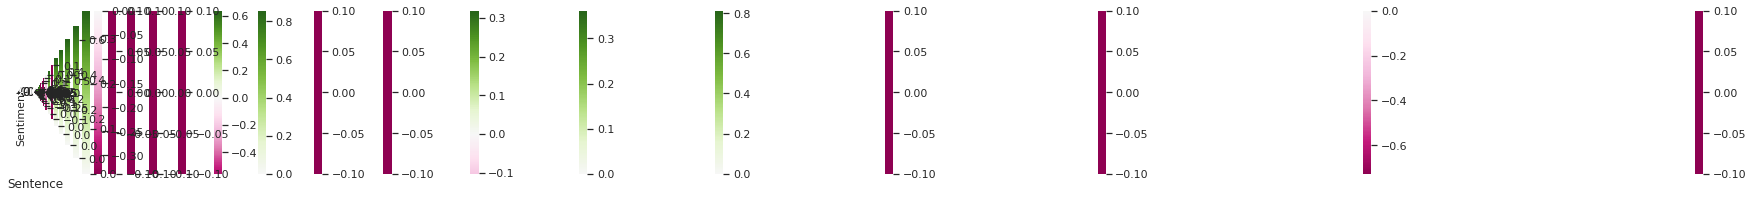

In [ ]:
jl13 = Jl1_base
jl23 = Jl2_base

negative = 0
positive = 0
neutral = 0


for tweet in jl13['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

for tweet in jl23['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


Influence_JL1 = ((108 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_JL1)

## 3) TEXTBLOB


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.33999999999999997, subjectivity=0.54)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.10000000000000002, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=0.75, subjectivity=0.75)
Sentiment(polarity=0.2625, subjectivity=0.23)
Sentiment(polarity=0.125, subjectivity=1.0)
Sentiment(polarity=0.494047619

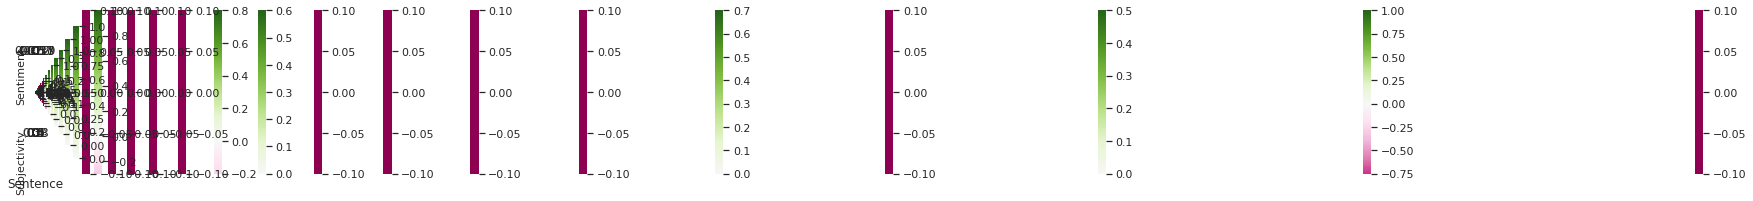

In [ ]:
jl24 = Jl2_base
jl14 = Jl1_base

negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in jl14['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

for tweet in jl24['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1



Influence_JL = ((108 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_JL) 

## 4) XGBOOST ALGORITHMA 

In [ ]:
jl15 = Jl1_base
jl25 = Jl2_base

neg = 0
pos = 0




for tweet in jl15['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

for tweet in jl25['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1


Influence_JL = ((108 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_JL)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

#Madona 